<img src="img/unicamp.png" width="400">



# Braço Robótico 


## Overview 
•O braço robótico é do tipo RP.

•A junta rotativa possui o comprimento $r_{1}=500mm $ e um grau de liberade $ 0º \leq \theta \leq 90º$

•A junta prismática apresenta um comprimento $0mm \leq r_{2} \leq 500mm$

## Manipulação
•Para facilitar tanto o cinemático direto quanto o cinemático inverso, o braço robótico foi representado como dois vetores, um para a junta rotativa e outro para a junta prismática.

•O ponto de origem do braço robótico corresponde ao ponto de origem do sistem $O = (0,0)$

## Código
•O código de manipulação do robô foi feita em python3, utilizando o módulo numpy e matplotlib, além de outro script que foi feito para esse trabalho chamado `vectors`, para manipulação de vetores.

#### Imports 



In [6]:
import vectors
import matplotlib.pyplot as plt
import numpy as np

#### 1.0 Class definition e constructor
•Definiremos a classe `robotic_arm`, que tera os seguintes atributos:

   <img src="img/Variables_table.png" width="400">

In [7]:
class robotic_arm():

    def __init__(self):
        
        ######## Create variables for this class ########
        
        # The origin point for the robotic arm  
        self.origin_point = vectors.point(0,0)

        # the vector representing the rotating arm at the default position
        self.arm_vector = vectors.vector2(x=500,y=0)

        # The vector that represents the retracting arm
        self.retracting_arm_vector = vectors.vector2(500,0)

        # The target point used in the reverse kinematics
        self.target = vectors.point(0,0)

#### 1.1 `reset_rotating_arm( )`
•Método que retorna o vector representante da junta rotativa de volta para seu valor inicial de:
   $$\vec{v} = \begin{pmatrix} 500 \\ 0 \end{pmatrix}$$

In [8]:
    def reset_rotating_arm(self):

        # the vector representing the rotating arm at the default position
        self.arm_vector = vectors.vector2(x=500,y=0)

#### 1.2 `reset_retracting_arm( )`
•Método que extende a junta prismática para seu comprimento máximo $r_2=500 mm$ paralelo ao eixo $x$


In [9]:
    def reset_retracting_arm(self):

        # The vector that represents the retracting arm
        self.retracting_arm_vector = vectors.vector2(500,0)

#### 1.3 `set_target( )`
•Método que recebe um `vector.point` como parâmetro e implementa ele como ponto alvo da garra robótica

In [10]:
    def set_target(self, target_point):

        self.target = target_point

#### 1.4 `calculate_movemet_to_target( )`
•Método que faz todos os cálculos necessários para mover as juntas do robô para que consiga chegar no ponto alvo.

##### 1º Passo:

   Determinar o vetor da origem do robo $O=(0,0)$ até o ponto alvo $A=(x_{1},y_{1})$ através do método `vector_from_points( )` do módulo `vectors`
   
  $$\vec{V} = \vec{OA} = \begin{pmatrix} x_{1} - 0 \\ y_{1} - 0 \end{pmatrix}$$
  
##### 2º Passo:

   Devemos conferir se a norma desse vetor é menor do que a norma do vetor rotativo, pois é a menor distância que o braço consegue alcançar. Se for menor o algoritmo retornará um erro.
   
##### 3º Passo:

   Calculamos o ângulo entre o vetor $\vec{V}$ e o eixo $x$.
   
   $$ \lVert \vec{V} . \vec{x_{0}} \rVert  = \lVert \vec{V} \rVert . \lVert \vec{x_{0}} \rVert . \cos {\theta} $$

$$ \cos {\theta} = \dfrac{\lVert \vec{V} . \vec{x_{0}} \rVert} {\lVert \vec{V} \rVert . \lVert \vec{x_{0}} \rVert} $$

$$ \theta = \arccos{\left(\dfrac{\lVert \vec{V} . \vec{x_{0}} \rVert} {\lVert \vec{V} \rVert . \lVert \vec{x_{0}} \rVert}\right)} $$

##### 4º Passo:

   Verificamos se o angulo $\theta$ está dentro dos limites da junta rotativa : 
   $$0º \leq \theta \leq 90º$$
   
   Se estiver fora do aceitável, o algoritmo retornará um erro.
   
   
##### 5º Passo:

   Depois de determinado o ângulo, nós rotacionamos o vetor da junta rotativa em $\theta$ graus:
   
   $$ \vec{v'} = R_{\theta} . \vec{v} $$ 

$$ v' = \begin{pmatrix} \cos{\theta} & -\sin{\theta} \\  \sin{\theta} & \cos{\theta} \end{pmatrix} . \begin{pmatrix} x \\ y \end{pmatrix}$$

##### 6º Passo:

   Calculamos quanto que o braço retrátil deve se extender para finalmente alcançar o ponto alvo.
   
   Fazemos isso subtraindo o vetor $\vec{v}$ que representa a junta rotativa com norma fixa do $\vec{V}$ que representa o vetor da origem até o ponto alvo.
   
   $$\vec{w} = \vec{V} - \vec{v}$$
   
##### 7º Passo:

   Conferimos a norma do vetor $\vec{w}$, se for maior do que o alcance máximo da junta prismática, o algortimo retornará um erro notificando o usuário.
   
###### Implementação do código:

In [11]:
    def calculate_movemet_to_target(self):

        # First determine the vector from the origin point of the robot to the target point 
        v = self.origin_point.vector_from_points(self.target)

        # If the norm of the v vector is smaller than 500, it's outside the workspace since the smallest
        # vector possible is when the retracting arm = 0
        if v.norm() < 500:
            raise KeyError('[ERROR] Range error: Point outside workspace')

        # Check to see if the angle between the v target vector and the x axis is outside the arms range (0<=angle<=90)
        reference_angle = v.angle()
        if reference_angle > 90 or reference_angle<0:
            raise KeyError('[ERROR] Range Error: The angle desired %s is outsie the range of motion'%(str(reference_angle)))
       
        # Calculate the angle which the arm will have to rotate from its current position to go to the target position
        target_angle = v.angle(self.arm_vector)

        # Rotate the arm vector that amount 
        self.arm_vector = self.arm_vector.rotate_vector(target_angle)

        # subtract the arm vector from the target v vector, which will result in how much the retracting arm will need to move 
        self.retracting_arm_vector = v - self.arm_vector

        # The max length of the retracting is 0,5m (aka 500mm)so if the nor of the vector is gratter than that, raise an error
        if self.retracting_arm_vector.norm() > 500:
            raise KeyError('[ERROR] Range error: Point outside workspace')
        
        print('The angle of movement is:',target_angle)
        print('The vector representing the rotating arm is:', self.arm_vector)
        print('The vector representing the retracting arm is:', self.retracting_arm_vector)

#### 1.5 `rotate_robotic_arm( )`
• Método para fazer a rotação da junta rotativa, como explicado na seção 1.4:

 $$ \vec{v'} = R_{\theta} . \vec{v} $$ 

$$ v' = \begin{pmatrix} \cos{\theta} & -\sin{\theta} \\  \sin{\theta} & \cos{\theta} \end{pmatrix} . \begin{pmatrix} x \\ y \end{pmatrix}$$

In [12]:
    def rotate_robotic_arm(self,angle):

        # rotate the robotic arm 
        self.arm_vector = self.arm_vector.rotate_vector(angle)
        
        # also 'rotate' the retracting arm 
        self.retracting_arm_vector = self.retracting_arm_vector.rotate_vector(angle - self.arm_vector.angle())

#### 1.6 `extand_arm( )`
•Método para extender ou diminuir o vetor da junta prismática.

•Como o vector que representa a junta prismática é Linearmente Dependente do vetor que representa a junta rotativa, para determinarmos as componentes $x$ e $y$ do vetor prismático precisamos apenas multiplicar o vetor rotativo por um escalar $\alpha$ que represente a porcentagem do valor total do vetor prismático.
$$0 \leq \alpha \leq 1$$

In [13]:
    def extand_arm(self, percentage):
        
        self.retracting_arm_vector = self.arm_vector.multiplication_by_scalar(percentage)

#### 1.7 `plot_robotic_arm( )`

•Método para visualizar os vetores que representam o braço robótico.

•Utilizamos o módulo `matplotlib`.

In [14]:
    def plot_robotic_arm(self):

        %matplotlib inline

        # Create the subplots
        fig,ax = plt.subplots()

        # create the vector representation of the rotating robotic arm
        ax.quiver(self.origin_point.x,self.origin_point.y, self.arm_vector.x , self.arm_vector.y,color='orange' , units='xy' ,scale=1)

        # Create the vector that will represent the retracting robot arm 
        plt.quiver(self.arm_vector.x,self.arm_vector.y, self.retracting_arm_vector.x, self.retracting_arm_vector.y,color='b', units='xy' ,scale=1)

        # Equalize the axis and vectors 
        ax.set_aspect('equal')

        # set the grids 
        plt.grid()

        # set the limits in the graph 
        plt.xlim(0,1000)
        plt.ylim(0,1000)

        # set the labels 
        plt.xlabel('X component (mm)')
        plt.ylabel('Y component (mm)')

        plt.title('Robotic Arm')

        # show the plot
        plt.show()

#### 1.8 `plot_workspace( )`
•Método "brute force" de determinação e vizualização do workspace do robô.

•Calculado através de $9 . 10^6$ iterations ( i.e $9 . 10^6$ pontos calculados), armazenando as coordenadas desses pontos encontrados, que posteriormente são vizualizados em um scatter plot utilizando matplotlib.

In [15]:
    def plot_workspace(self):
        
        %matplotlib inline
        
        x_coordinates = []
        y_coordinates = []

        # Iterate through all the possible angles for the rotating robotic arm 
        for angle in np.arange(0,90.01,0.01):

            # move the robotic arm 
            self.rotate_robotic_arm(angle)

            # Iterate through all the possible lengths of the extending arm 
            for percentage_of_arm in np.arange(0,1.001,0.001):

                # update the arm lenght 
                self.extand_arm(percentage_of_arm)

                # Calculate the x coordinate of the tip of the arm
                x_coordinates.append(self.origin_point.x+self.arm_vector.x+self.retracting_arm_vector.x)

                # Calculate the y cooridnate of the tip of the arm 
                y_coordinates.append(self.origin_point.y+self.arm_vector.y+self.retracting_arm_vector.y)

                # reset the lenght of the arm 
                self.reset_retracting_arm()


            # set the robotic arm back to the original position 
            self.reset_rotating_arm()

        # Plot all the poinst 
        plt.plot(x_coordinates,y_coordinates,'o',color = ('black'))
        plt.title("Robot's Workspace")
        plt.show()

## Exemplos 

### Cinemática Direta 


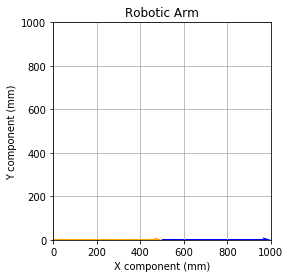

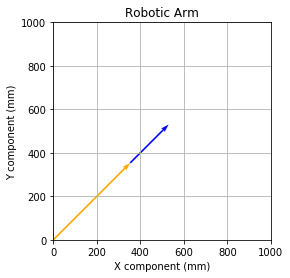

[[530.3325],[530.3325]]


In [45]:
# import the necessary modules
import vectors
import robot

%matplotlib inline

# Instantiate the robot_arm class 
garra = robot.robotic_arm()

# plot the arm in the default position
garra.plot_robotic_arm()

# change the angle and the size of the retracting arm and plot again
garra.rotate_robotic_arm(45) #Rotate 45º
garra.extand_arm(.5)         #Extend 50% the total length
garra.plot_robotic_arm()     #Show the plot
print(garra.retracting_arm_vector + garra.arm_vector)

## Cinemática Indireta 

The angle of movement is: 63.43494882292201
The vector representing the rotating arm is: [[223.605],[447.215]]
The vector representing the retracting arm is: [[129.94839059],[259.89178119]]


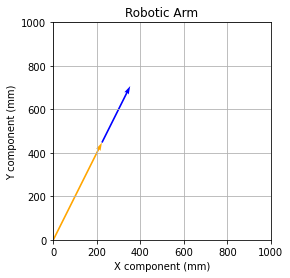

In [119]:
# import the necessary modules
import vectors
import robot
import math

%matplotlib inline

# Instantiate the robot_arm class 
garra = robot.robotic_arm()

# Create a point which is going to be our target point 
target_point = vectors.point(1000*(math.sqrt(2)/4),1000*(math.sqrt(2)/2))
garra.set_target(target_point)

# Calculate the robot's movement
garra.calculate_movemet_to_target()
garra.plot_robotic_arm()

## Workspace

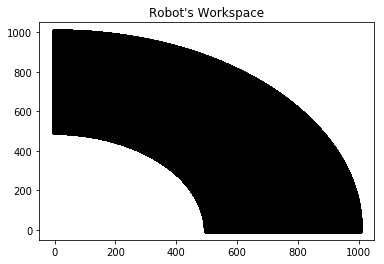

In [27]:
# import the necessary modules
import vectors
import robot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Instantiate the robot_arm class 
garra = robot.robotic_arm()
garra.plot_workspace()

## Perfil Trapezoidal de Velocidade

• Supondo que em um certo trabalho a garra robótica necessite de fazer um percurso que é um quadrado de vértices: $P_{1}, P_{2}, P_{3}, P_{4}$, respectivamente, onde $P_{1} = (\frac{\sqrt{2}}{4},\frac{\sqrt{2}}{4})$, $P_{2} = (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{4})$, $P_{3} = (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2})$, $P_{4} = (\frac{\sqrt{2}}{4},\frac{\sqrt{2}}{2})$, em um período de tempo $T_{total} = 10s$, tendo início no ponto $P_{1}$.

• Sua junta rotativa deve seguir a seguinte tragetória para cada trexo do percurso(i.e de $P_{1}$ até $P_{2}$, $P_{2}$ até $P_{3}$ ... ):

<img src="img/Perfil_Trapezoidal" width="500">
-Onde cada $\Delta T = \frac{T_{total}}{4} = 2.5 s$

-Onde $t_s = \Delta T \times  10 \% = 0.25 s$


• Da mesma forma, sua junta prismática deve seguir tragetória similar mas com velocidade linear.



### $P_1$ a $P_2$

•Temos :
    $P_{1} = (\frac{\sqrt{2}}{4},\frac{\sqrt{2}}{4})$, $P_{2} = (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{4})$.
   
Passos:
   1. Achar $\theta _{1}$ e $\theta _{2}$;
   2. Calcular $\Delta \theta$;
   3. Calcular $\omega _{max} = \frac{\Delta \theta}{\Delta T - t_s}$
   4. Criar gráfico representativo
   5. Achar o $\Delta S $ que a junta prismática precisará executar
   6. Criar um gráfico representativo do perfil de velocidade da junta prismática 
    

#### 1. Achar $\theta_1$ e $\theta_2$

•Primeiro criamos os pontos $P_1$ e $P_2$;

•Depois criamos vetores da origem do robô até cada um dos pontos.

•Usamos o método que criamos para achar o ângulo entre o esses vetores e o eixo X;

In [3]:
# import the necessary modules
import vectors
import robot
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Instantiate the robot_arm class 
garra = robot.robotic_arm()

# Create P1 and P2 points 
p_1 = vectors.point(1000*(math.sqrt(2)/4), 1000*(math.sqrt(2)/4))
p_2 = vectors.point(1000*(math.sqrt(2)/2), 1000*(math.sqrt(2)/4))

# Create the vectors 
v_1 = garra.origin_point.vector_from_points(p_1)
v_2 = garra.origin_point.vector_from_points(p_2)

# Get the angles 
theta_1 = v_1.angle()
theta_2 = v_2.angle()


#### 2. Calcular $\Delta \theta$

•Como já temos $\theta_1$ e $\theta_2$ só precisamos subtrair.

In [4]:
delta = theta_2 - theta_1
print('∆theta:',delta)

∆theta: -18.434948822922014


#### 3. Calcular $\omega_{max}$

•Como vimos anteriormente:

   - $\Delta T = 2.5s$
   - $t_{s} = 0.25s$
   - $\omega_{max} = \frac{\Delta \theta}{\Delta T - t_{s}}$.

In [5]:
max_ang_velocity = (delta/(2.5 - 0.25))
print('Max angular velocity:',max_ang_velocity, 'degrees/s')

Max angular velocity: -8.193310587965339 degrees/s


#### 4. Gráfico 

•O gráfico seria dividido em basicamente 3 partes:

   1. Aceleração entre $t_{0} = 0$ até $t = 0.25s$ com valor igual à $\alpha = \frac{\Delta \omega}{t_{2}} = \frac{\omega_{max} - 0}{t_{2}} = \frac{\omega_{max}}{0.25s}$;
   2. Velocidade Constante entre $t = 0.25s$ até $t = 2.25$, com $\omega = \omega_{max}$;
   3. Desaceleração de mesma intencidade que a aceleração $\therefore \alpha' = - \frac{\omega_{max}}{0.25s}$

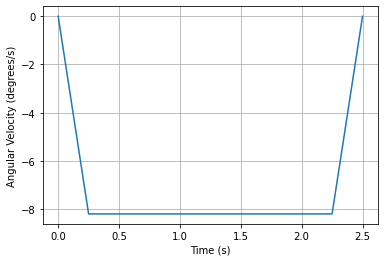

In [6]:
x = [0, 0.25, 2.25, 2.5]
y = [0, max_ang_velocity, max_ang_velocity, 0]

plt.grid() 
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (degrees/s)')
plt.plot(x,y)
plt.show()

#### 5. $\Delta S$ da junta prismática

Para Descobrismos o $\Delta S$ precisamos somente comparar as normas do vetores que representam um braço robótico  no ponto inicial $P_{1}$ e outro braço robótico no ponto final $P_{2}$.

In [15]:
# Instantiate the robot_arm class 
garra_1 = robot.robotic_arm()
garra_2 = robot.robotic_arm()


# Set the robotic arms to their corresponding points
garra_1.set_target(p_1)
garra_2.set_target(p_2)

garra_1.calculate_movemet_to_target()
print()
garra_2.calculate_movemet_to_target()

# garra_1.plot_robotic_arm()
# garra_2.plot_robotic_arm()

# Get the norm for each retracting vector
norm_1 = garra_1.retracting_arm_vector.norm()
norm_2 = garra_2.retracting_arm_vector.norm()

# Calculate the Delta
delta_s = norm_2 - norm_1
print()
print()
print('Delta S:', delta_s)

The angle of movement is: 45.00000000000001
The vector representing the rotating arm is: [[353.555],[353.555]]
The vector representing the retracting arm is: [[-0.00160941],[-0.00160941]]

The angle of movement is: 26.565051177077994
The vector representing the rotating arm is: [[447.215],[223.605]]
The vector representing the retracting arm is: [[259.89178119],[129.94839059]]


Delta S: 290.5666867610836


#### 6. Gráfico do perfíl de velocidade da junta prismática

De forma análoga a como foi feito com a junta rotativa, a velocidade linear máxima da junta prismática $V_{máx} = \frac{\Delta s}{\Delta T - t_{s}}$

Max velocity: 129.14074967159272 mm/s


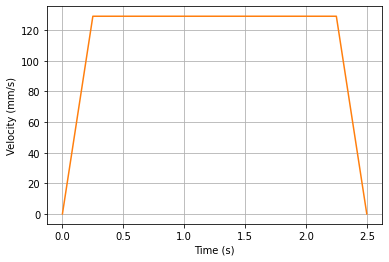

In [101]:
# Calculate the max velocity
max_velocity = (delta_s/(2.5 - 0.25))
print('Max velocity:',max_velocity,'mm/s')

# plot the trapezoidal profile
x = [0, 0.25, 2.25, 2.5]
y = [0, max_velocity, max_velocity, 0]

plt.grid() 
plt.xlabel('Time (s)')
plt.ylabel('Velocity (mm/s)')
plt.plot(x, y, 'C1')
plt.show()

#### Modelagem de uma função 
•Como teremos que fazer todos esses procedimentos mais 3 vezes podemos criar uma função que agilize esse processo.

In [102]:
def trapezoidal_profile(point_i, point_f, time_interval):

    ###################### Angular velocity profile ######################
    
    garra = robot.robotic_arm()
    # Create the vectors from points
    v_1 = garra.origin_point.vector_from_points(point_i)
    v_2 = garra.origin_point.vector_from_points(point_f)

    # Get the angles between them
    theta_1 = v_1.angle()
    theta_2 = v_2.angle()
    
    print('Theta 1:',theta_1)
    print('Theta 2:',theta_2)
    
    # Calculate the Delta
    delta = theta_2 - theta_1
    print('∆theta:',delta)
    
    # Calculate the Max angular velocity 
    max_ang_velocity = (delta/(2.5 - 0.25))
    print('Max angular velocity:',max_ang_velocity, 'degrees/s')
    print()
    print()
    
    # Generate the trapezoidal profile
    y_angular = [0, max_ang_velocity, max_ang_velocity, 0]

    
    ###################### Linear velocity profile ######################
    
    # Instantiate the robot_arm class 
    garra_1 = robot.robotic_arm()
    garra_2 = robot.robotic_arm()


    # Set the robotic arms to their corresponding points
    garra_1.set_target(point_i)
    garra_2.set_target(point_f)

    garra_1.calculate_movemet_to_target()
    print()
    garra_2.calculate_movemet_to_target()

    # garra_1.plot_robotic_arm()
    # garra_2.plot_robotic_arm()

    # Get the norm for each retracting vector
    norm_1 = garra_1.retracting_arm_vector.norm()
    norm_2 = garra_2.retracting_arm_vector.norm()

    # Calculate the Delta
    delta_s = norm_2 - norm_1
    print()
    print()
    print('Delta S:', delta_s)
    
    # Calculate the max velocity
    max_velocity = (delta_s/(2.5 - 0.25))
    print('Max velocity:',max_velocity,'mm/s')


    # plot the trapezoidal profile
    y_linear = [0, max_velocity, max_velocity, 0]

    
    ###################### Plotting ######################

    fig = plt.figure(figsize=(20,5))
    angular_profile = fig.add_subplot(1,2,1)
    linear_profile = fig.add_subplot(1,2,2, sharex = angular_profile)
    
    angular_profile.set_title('Angular Velocity Profile')
    angular_profile.set_ylabel('degrees/s')
    angular_profile.set_xlabel('time (s)')
    angular_profile.grid()

    angular_profile.plot(time_interval, y_angular)
    
    linear_profile.set_title('Linear Velocity Profile')
    linear_profile.set_ylabel('mm/s')
    linear_profile.set_xlabel('time (s)')
    linear_profile.grid()
    
    linear_profile.plot(time_interval, y_linear, 'C1')
    
    plt.show()

### $P_2$ a $P_3$

•Temos :
    $P_{2} = (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{4})$, $P_{3} = (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2})$.

Theta 1: 26.565051177077994
Theta 2: 45.00000000000001
∆theta: 18.434948822922014
Max angular velocity: 8.193310587965339 degrees/s


The angle of movement is: 26.565051177077994
The vector representing the rotating arm is: [[447.215],[223.605]]
The vector representing the retracting arm is: [[259.89178119],[129.94839059]]

The angle of movement is: 45.00000000000001
The vector representing the rotating arm is: [[353.555],[353.555]]
The vector representing the retracting arm is: [[353.55178119],[353.55178119]]


Delta S: 209.4287611492772
Max velocity: 93.07944939967875 mm/s


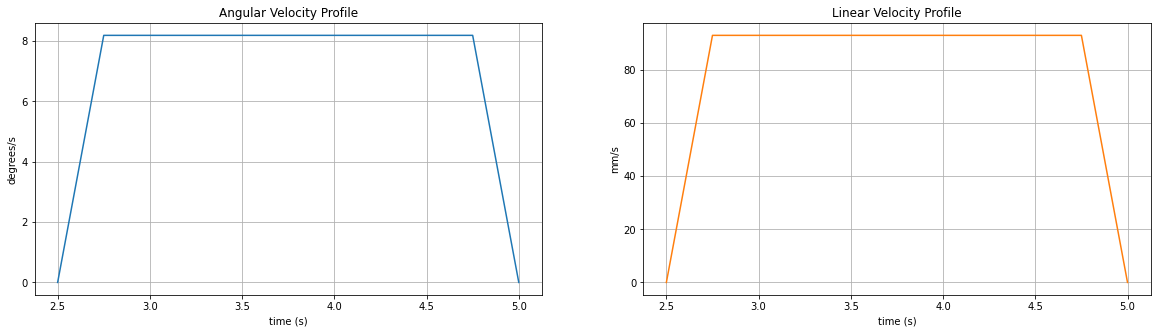

In [103]:
p_2 = vectors.point(1000*(math.sqrt(2)/2), 1000*(math.sqrt(2)/4))
p_3 = vectors.point(1000*(math.sqrt(2)/2), 1000*(math.sqrt(2)/2))

time = [2.5, 2.75, 4.75, 5]
trapezoidal_profile(p_2, p_3, time)

### $P_3$ a $P_4$

•Temos :
    $P_{3} = (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2})$, $P_{4} = (\frac{\sqrt{2}}{4},\frac{\sqrt{2}}{2})$

Theta 1: 45.00000000000001
Theta 2: 63.43494882292201
∆theta: 18.434948822922003
Max angular velocity: 8.193310587965335 degrees/s


The angle of movement is: 45.00000000000001
The vector representing the rotating arm is: [[353.555],[353.555]]
The vector representing the retracting arm is: [[353.55178119],[353.55178119]]

The angle of movement is: 63.43494882292201
The vector representing the rotating arm is: [[223.605],[447.215]]
The vector representing the retracting arm is: [[129.94839059],[259.89178119]]


Delta S: -209.4287611492772
Max velocity: -93.07944939967875 mm/s


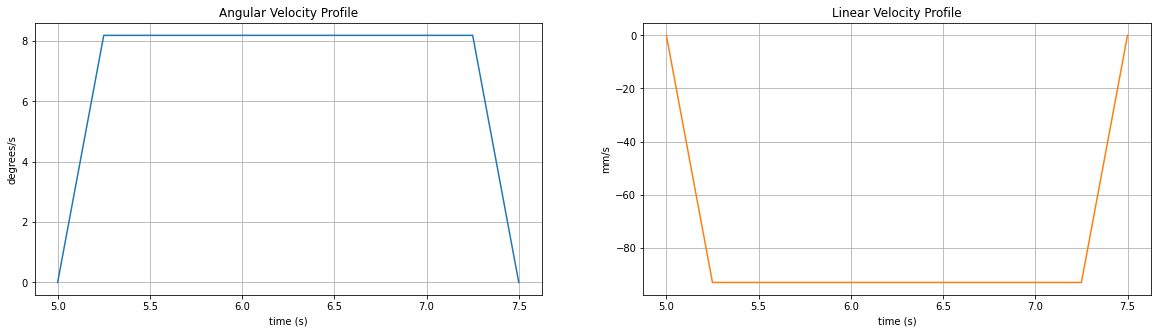

In [104]:
p_3 = vectors.point(1000*(math.sqrt(2)/2), 1000*(math.sqrt(2)/2))
p_4 = vectors.point(1000*(math.sqrt(2)/4), 1000*(math.sqrt(2)/2))

time = [5, 5.25, 7.25, 7.5]
trapezoidal_profile(p_3, p_4, time)

### $P_4$ a $P_1$

•Temos :
    $P_{4} = (\frac{\sqrt{2}}{4},\frac{\sqrt{2}}{2})$, $P_{1} = (\frac{\sqrt{2}}{4},\frac{\sqrt{2}}{4})$

Theta 1: 63.43494882292201
Theta 2: 45.00000000000001
∆theta: -18.434948822922003
Max angular velocity: -8.193310587965335 degrees/s


The angle of movement is: 63.43494882292201
The vector representing the rotating arm is: [[223.605],[447.215]]
The vector representing the retracting arm is: [[129.94839059],[259.89178119]]

The angle of movement is: 45.00000000000001
The vector representing the rotating arm is: [[353.555],[353.555]]
The vector representing the retracting arm is: [[-0.00160941],[-0.00160941]]


Delta S: -290.5666867610836
Max velocity: -129.14074967159272 mm/s


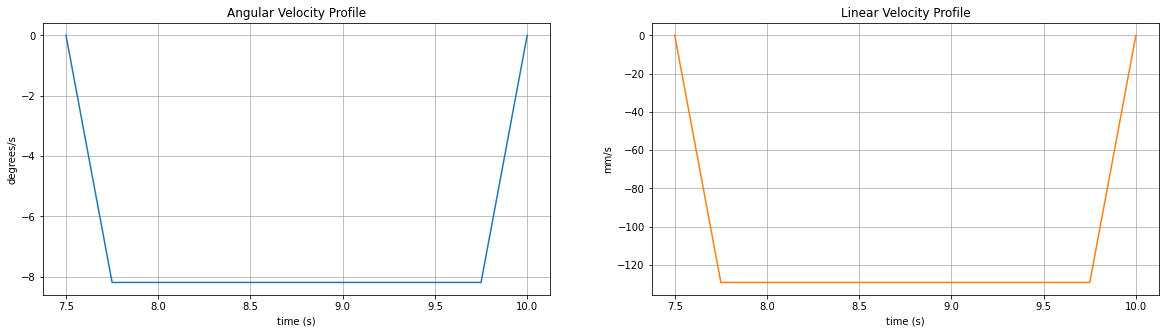

In [105]:
p_4 = vectors.point(1000*(math.sqrt(2)/4), 1000*(math.sqrt(2)/2))
p_1 = vectors.point(1000*(math.sqrt(2)/4), 1000*(math.sqrt(2)/4))

time = [7.5, 7.75, 9.75, 10]
trapezoidal_profile(p_4, p_1, time)

## Modelo Dinâmico 

### • Junta Rotacional :
    
   -temos: $J_{1} = 0.1 Kg\cdot m^{2}, B_{1} = 0,02 N \cdot m \cdot s$
   
   $$T_{1} = J_{1} \cdot \frac{d\omega}{dt} + B_{1} \cdot \omega$$
   
   $$T_{1} = 0.1 \cdot \frac{d\omega}{dt} + 0,02 \cdot \omega$$ 
   
   
### • Junta Prismática :
    
   -temos: $m_{2} = 1Kg, b_{2} = 0,2 N \cdot m/s$
   
   $$F_{2} = m_{2} \cdot \frac{dv}{dt} + b_{2} \cdot v$$
   
   $$F_{2} = 1 \cdot \frac{dv}{dt} + 0,2 \cdot v$$ 
    
        

## Controle de Velocidade 

•Para o modelo proposto temos que o erro $e = \omega^{*} - \omega$, onde $ \omega^{*} $ é o valor esperado de $1rad/s$ e $\omega$ é o valor real do robô .

•Para fazermos o controle podemos utilizar uma constate $K_{p}$ arbitrária que diminui o erro.

•Podemos inserir o erro $e$ e a constate $K_{p}$ para compensar essas discrepâncias,atribuindo uma variável $T = K_{p} \cdot e$   na equação de correção da velocidade angular.

•Com isso podemos achar o novo valor alvo de $\omega$ que o sistema deve ter para diminuir a diferença entre output e input:


$$\omega = \frac{T - J_{1} \left(\frac{\omega(t) - \omega(t-1)}{\Delta t} \right)}{B_{1}}$$

$$\frac{\Delta t}{\Delta t} \cdot \omega(t)\cdot B_{1} = T \cdot \frac{\Delta t}{\Delta t} - \frac{J_{1} \cdot \omega(t)}{\Delta t} + \frac{J_{1} \cdot \omega(t-1)}{\Delta t}$$

$$\Delta t \cdot \omega(t) \cdot B_{1} = T \cdot \Delta t - J_{1} \cdot \omega(t) + J_{1} \cdot \omega(t-1)$$

$$\Delta t \cdot \omega(t) \cdot B_{1} + J_{1} \cdot \omega(t) = T \cdot \Delta t  + J_{1} \cdot \omega(t-1)$$

$$\omega(t)[ \Delta t \cdot B_{1}  + J_{1}] = T \cdot \Delta t  + J_{1} \cdot \omega(t-1)$$

$$\omega(t) = \frac{T \cdot \Delta t  + J_{1} \cdot \omega(t-1)}{[ \Delta t \cdot B_{1}  + J_{1}]}$$

$$\omega(t) = \frac{1}{B_{1} + \frac{J_{1}}{\Delta t}} \left( T + \frac{J_{1} \cdot \omega(t-1)}{\Delta t} \right)$$

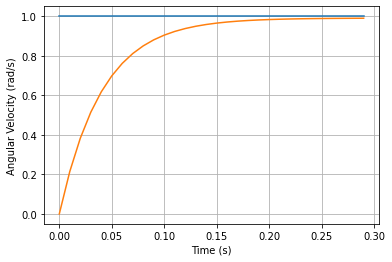

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Kp = 2.15
e  = 0.02
J  = 0.1
b  = 0.02
time_interval = 0.01

time = np.arange(0,0.3, time_interval)
# pd.DataFrame(time)

# Generate the target velocity profile
target_velocity = [1 for t in time]

w_velocity = []
error = []
u = []
for index,t in enumerate(time):
        
        if index == 0:
            w_velocity.append(0)
            error.append(1)
            u.append( 1 * Kp)
            
        else:
            velocity = 1/(0.1/time_interval+0.02)*(u[index-1]+w_velocity[index - 1]/time_interval*0.1)
            w_velocity.append(velocity)
            error_value = 1 - velocity 
            error.append(error_value)
            u.append(Kp * error_value)
            
            
plt.plot(time,target_velocity, label = 'Target Velocity')
plt.plot(time, w_velocity, label = 'Controlled Velocity')

plt.ylabel('Angular Velocity (rad/s)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()

## Acoplamento Mecânico

Precisamos fazer o dimencionamento da redução do torque produzido pelo motor DC para que seja capaz de entregar o torque máximo necessário pelas juntas.

### Junta Rotacional 

Sabemos que $Red = \frac{T_{1}}{T_{m}}$, onde $T_{m}$ é o torque fornecido pelo motor e $T_{1}$ é o torque necessário pela junta prismática.

Além disso sabemos as seguintes informações sobre o motor:

$$h_{p} = 5 $$
$$Rpm = 1750$$

Com essas informações podemos calcular o torque $T_{m}$:

$$T_{m} = \frac{h_{p} \cdot 745.7}{2π \cdot \left( \frac{1}{60} \cdot Rpm \right) }$$

$$T_{m} = \frac{745.7 \cdot 5}{2π \left( \frac{1750}{60} \right)} \approx 20.34$$


Como temos $T_{m}$, precisamos encontrar somente $T_{1}$ (utilizando as equações do modelo dinânico) para conseguirmos encontrar a redução:

 -temos: $J_{1} = 0.1 Kg\cdot m^{2}, B_{1} = 0,02 N \cdot m \cdot s$
   
   $$T_{1} = J_{1} \cdot \frac{d\omega}{dt} + B_{1} \cdot \omega$$
   
 -Onde $\frac{d\omega}{dt}$ é a aceleração angular máxima que sofrerá (pois com isso teremos o torque máximo que o motor precisará):
  
  $$\alpha_{max} =\frac{d\omega_{max}}{dt} = \frac{8.19}{0.25} = 32.76 º/s = 0.57rad/s$$
  
 -A partir desses valores chegamos no valor de torque:
 $$T_{1} = 0.1 \cdot 0.57 + 0.02 \cdot 0.14$$
  $$T_{1} \approx 0.06$$
  
  
Podemos calcular a redução necessária:
$$red = \frac{T_{1}}{T_{m}}$$

$$red = \frac{0.06}{20.34}$$

$$red = 0.003$$

Para nosso sistema, precisaríamos de uma caixa de redução não muito comum de ser achada. Com isso seria possível utilizar uma caixa de redução 1:300, que daria aproximadamente 0.0033, que é suficiente para nossa aplicação.


### Junta Prismática 

De forma similar à junta rotacional, sabemos que $Red = \frac{F_{2}}{T_{m}}$, onde $F_{2}$ é a força que a junta necessita e $T_{m} = 20.34$ o torque fornecido pelo motor (do mesmo tipo do motor da junta rotacional).

Como já temos o $T_{m}$, precisamos somente encontrar $F_{2}$, utilizando as equações do modelo dinânico:

-temos: $m_{2} = 1Kg, b_{2} = 0,2 N \cdot m/s$
   
   $$F_{2} = m_{2} \cdot \frac{dv}{dt} + b_{2} \cdot v_{max}$$
   
   $$F_{2} = 1 \cdot \frac{dv}{dt} + 0,2 \cdot v_{max}$$ 
   
 -onde $\frac{dv}{dt} = \frac{129.14}{0.25}$, que representa a aceleração máxima que a junta prismática é submetida.
 
   $$F_{2} = 1 \cdot 0.516 + 0,2 \cdot 129.14$$ 
   $$F_{2} \approx 0.542$$ 
   
Podemos então calcular a redução:

   $$Red = \frac{0.542}{20.34} \approx 0.026$$

##  Integração do sistema e teste final

Agora iremos fazer a integração de todos os métodos de controle vistos nos itens anteriores na garra que fará um perfil quadrado, visto anteriormente.

### Controle de Velocidade 
Levando em consideração um erro de 2%, no perfil trapezoidal proposto o item 3.3, iremos utilizar o controle de velocidade implementando a constade de porporcionalidade $K_{p}$.

#### Velocidade Angular

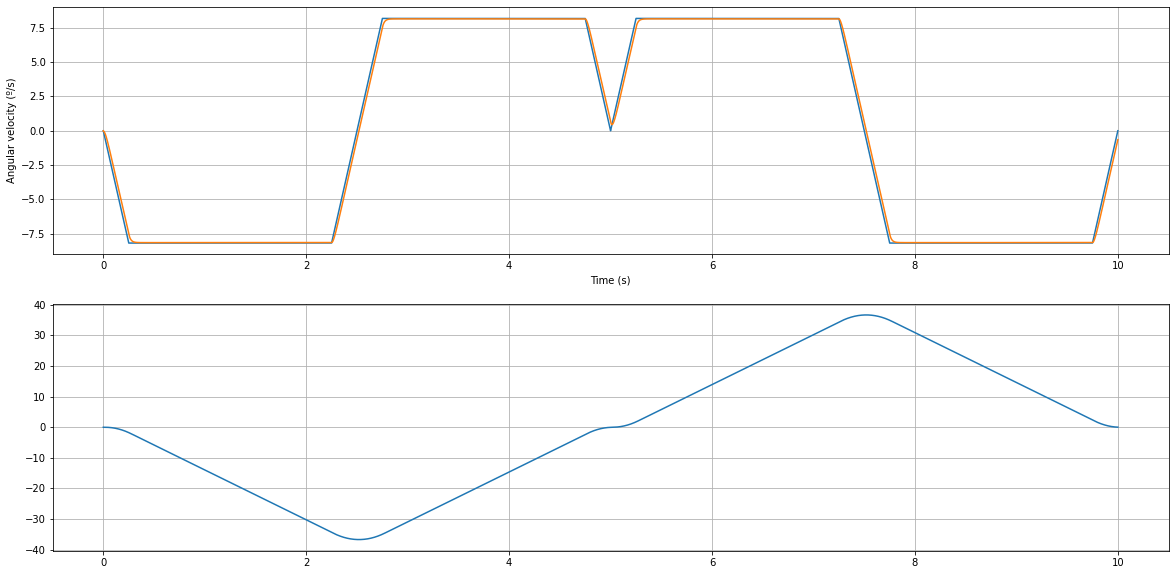

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Kp = 5

e  = 0.02
J  = 0.1
b  = 0.02
time_interval = 0.0001

time = np.arange(0, 10 + time_interval, time_interval)


# Generate the target velocity profile
target_angular_velocity = []
for t in time:
    
    ####### P1 ------ P2 #######
    if t <= 0.25:
        target_angular_velocity.append(t * -8.19/0.25)
    elif t <= 2.25:
        target_angular_velocity.append(-8.19)
    elif t <=2.5:
        target_angular_velocity.append((t - 2.25) * 8.19/0.25 - 8.19)
        
        
    ####### P2 ------ P3 #######       
    elif t <= 2.75:
        target_angular_velocity.append((t-2.5) * 8.19/0.25)
    elif t <=4.75:
        target_angular_velocity.append(8.19)
    elif t <=5:
        target_angular_velocity.append((t - 4.75) * -8.19/0.25 + 8.19)
        
    
    ####### P3 ------ P4 #######       
    elif t <= 5.25:
        target_angular_velocity.append((t-5) * 8.19/0.25)
    elif t <=7.25:
        target_angular_velocity.append(8.19)
    elif t <=7.5:
        target_angular_velocity.append((t - 7.25) * -8.19/0.25 + 8.19)
        
        
    ####### P4 ------ P1 #######
    elif t <= 7.75:
        target_angular_velocity.append((t - 7.5) * -8.19/0.25)
    elif t <= 9.75:
        target_angular_velocity.append(-8.19)
    elif t <=10:
        target_angular_velocity.append((t - 9.75) * 8.19/0.25 - 8.19)


w_velocity = []
error = []
u = []
z = []
for index,t in enumerate(time):
        
        if index == 0:
            z.append(0)
            w_velocity.append(0)
            error.append(-8.19)
            u.append( -8.19 * Kp)
            
        else:
            
            velocity = 1/(0.1/time_interval+0.02)*(u[index-1]+w_velocity[index - 1]/time_interval*0.1)
            z.append(((w_velocity[index - 1] + velocity) * time_interval ) + z[index - 1])
            w_velocity.append(velocity)
            error_value = target_angular_velocity[index] - velocity 
            error.append(error_value)
            u.append(Kp * error_value)
            

            
# fig = plt.figure(figsize=(20,5))
fig, plots = plt.subplots(figsize=(20,10) , nrows = 2, ncols = 1)

############## Angular velocity over time ##############
plots[0].plot(time,target_angular_velocity, label = 'Target Velocity')
plots[0].plot(time, w_velocity, label = 'Controlled Velocity')


plots[0].set(xlabel = 'Time (s)', ylabel = 'Angular velocity (º/s)')
plots[0].grid()

################### Angle over time ###################
plots[1].plot(time, z)

plt.grid()
plt.show()

#### Velocidade Linear

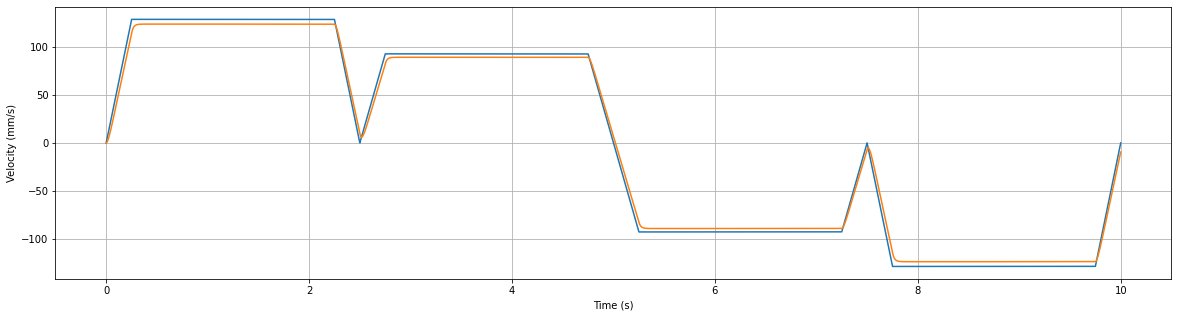

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Kp = 5
e  = 0.02
m  = 1
b  = 0.2
time_interval = 0.0001

time = np.arange(0, 10 + time_interval, time_interval)


# Generate the target velocity profile
target_linear_velocity = []
for t in time:
    
    ####### P1 ------ P2 #######
    if t <= 0.25:
        target_linear_velocity.append(t * 129.14074967159272/0.25)
    elif t <= 2.25:
        target_linear_velocity.append(129.14074967159272)
    elif t <=2.5:
        target_linear_velocity.append((t - 2.25) * -129.14074967159272/0.25 + 129.14074967159272)
        
        
    ####### P2 ------ P3 #######       
    elif t <= 2.75:
        target_linear_velocity.append((t-2.5) * 93.07944939967875/0.25)
    elif t <=4.75:
        target_linear_velocity.append(93.07944939967875)
    elif t <=5:
        target_linear_velocity.append((t - 4.75) * -93.07944939967875/0.25 + 93.07944939967875)
        
    
    ####### P3 ------ P4 #######       
    elif t <= 5.25:
        target_linear_velocity.append((t-5) * -93.07944939967875/0.25)
    elif t <=7.25:
        target_linear_velocity.append(-93.07944939967875)
    elif t <=7.5:
        target_linear_velocity.append((t - 7.25) * 93.07944939967875/0.25 - 93.07944939967875)
        
        
    ####### P4 ------ P1 #######
    elif t <= 7.75:
        target_linear_velocity.append((t - 7.5) * -129.14074967159272/0.25)
    elif t <= 9.75:
        target_linear_velocity.append(-129.14074967159272)
    elif t <=10:
        target_linear_velocity.append((t - 9.75) * 129.14074967159272/0.25 -129.14074967159272)


w_velocity = []
error = []
u = []
for index,t in enumerate(time):
        
        if index == 0:
            w_velocity.append(0)
            error.append(-8.19)
            u.append( -8.19 * Kp)
            
        else:
            
            velocity = 1/(0.1/time_interval+0.2)*(u[index-1]+w_velocity[index - 1]/time_interval*0.1)
            w_velocity.append(velocity)
            error_value = target_linear_velocity[index] - velocity 
            error.append(error_value)
            u.append(Kp * error_value)
            

            
fig = plt.figure(figsize=(20,5))
plt.plot(time,target_linear_velocity, label = 'Target Velocity')
plt.plot(time, w_velocity, label = 'Controlled Velocity')

plt.ylabel('Velocity (mm/s)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()

### Poisção por tempo 

Como temos os gráficos de velocidade angular e velocidade linear por tempo, se nós fizermos a integral desses gráficos teremos o angulo da junta rotativa $\theta $por tempo e o tamanho da junta prismática $r_{2}$ por tempo. Com essas informações, podemos achar a posição exata da garra em cada instante da tragetória através dos algorítmos criados para a sinemática direta.